In [101]:
import pandas as pd
import matplotlib.pyplot as plt

Rent Data

In [102]:
def get_data(sheet_name,header=4,nrows=19,index_col=0,
            file_name='rent_properties/private-sector-rent-stats-scotland-nov-2023.xlsx'):
    df=pd.read_excel(file_name,sheet_name=sheet_name,header=header,nrows=nrows,
                    index_col=index_col)
    return df
                             
one_bedroom_df=get_data('Table 1, Chart 2')
two_bedroom_df=get_data('Table 2, Chart 4')                             
three_bedroom_df=get_data('Table 3, Chart 6')
four_bedroom_df=get_data('Table 4, Chart 8')                          
shared_bedroom_df=get_data('Table 5, Chart 10')
                                                        

Wages Data

In [103]:
def get_data_wages(sheet_name,header=6,index_col=0,
            file_name='wages/rtisadec2023.xlsx'):
    df=pd.read_excel(file_name,sheet_name=sheet_name,header=header,
                    index_col=index_col)
    return df
r4_wages=get_data_wages("20. Median pay (LA)",header=7)
r3_wages=get_data_wages("16. Median pay (NUTS3)")
r2_wages=get_data_wages("12. Median pay (NUTS2)")
r1_wages=get_data_wages("8. Median pay (NUTS1)")
industry_wages=get_data_wages("24. Median pay (Industry)")


datazones=pd.read_csv('data_zones.csv')

/home/manuel/platzi/portfolio/current_projects/aberdeen/abervenv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/manuel/platzi/portfolio/current_projects/aberdeen/abervenv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/manuel/platzi/portfolio/current_projects/aberdeen/abervenv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/manuel/platzi/portfolio/current_projects/aberdeen/abervenv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, appl

In [104]:
matched4=list(set(one_bedroom_df.index) & set(r4_wages.columns))
matched3=list(set(one_bedroom_df.index) & set(r3_wages.columns))
rent4=two_bedroom_df.loc[matched4,2023]
wage4=r4_wages.loc['November 2023',matched4]
(rent4/wage4).sort_values()


Dumfries and Galloway    0.233065
North Lanarkshire        0.263839
Scottish Borders         0.266743
South Lanarkshire        0.276443
Perth and Kinross        0.279570
West Lothian             0.286003
West Dunbartonshire      0.303246
Fife                     0.314243
East Dunbartonshire      0.348389
dtype: float64

In [105]:
matched3=list(set(one_bedroom_df.index) & set(r3_wages.columns))
rent3=two_bedroom_df.loc[matched3,2023]
wage3=r3_wages.loc['November 2023',matched3]
ratios=(rent3/wage3).sort_values()

Text(0, 0.5, 'Median wage in pounds')

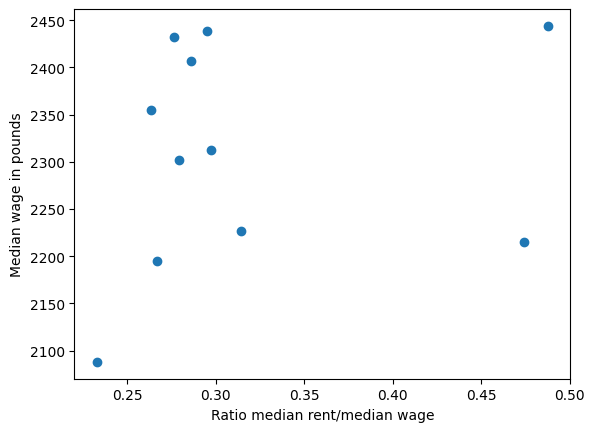

In [107]:
def calculate_ratio(wage_name,rent_name):
    wage=r4_wages[wage_name].iloc[-1]
    rent=two_bedroom_df.loc[rent_name,2023]
    ratio=rent/wage
    return ratio

ratios['City of Edinburgh']=calculate_ratio('City of Edinburgh','Lothian')
ratios['Aberdeen City']=calculate_ratio('Aberdeen City','Aberdeen and Shire')
ratios['Glasgow City']=calculate_ratio('Glasgow City','Greater Glasgow')
ratios['Perth and Kinross']=calculate_ratio('Perth and Kinross','Perth and Kinross')
ratios['Fife']=calculate_ratio('Fife','Fife')
ratios['Stirling']=calculate_ratio('Stirling','West Lothian')
ratios.sort_values()
plt.scatter(x=ratios,y=r4_wages[ratios.index].iloc[-1,:])
plt.xlabel("Ratio median rent/median wage")
plt.ylabel("Median wage in pounds")


In [ ]:
w_city=['Clackmannanshire',
'East Lothian',
 'Midlothian',
 'Scottish Borders',
 'City of Edinburgh',
 'Falkirk',
 'Stirling',
 'West Lothian',
 'Helensburgh and Lomond',
 'West Dunbartonshire',
 'Dumfries and Galloway',
 'East Ayrshire',
 'North Ayrshire mainland',
 'East Renfrewshire',
 'Renfrewshire',
 'Inverclyde',
 'South Ayrshire',
 'South Lanarkshire',
 'Aberdeen City',
 'Aberdeenshire',
 'Ross and Cromarty',
 'Caithness and Sutherland',
 'Inverness and Nairn',
 'Badenoch and Strathspey',
 'West Moray',
 'North East Moray',
 'Arran and Cumbrae',
 'Argyll and Bute Islands',
 'Argyll and Bute Mainland',
 'Lochaber',
 'Skye and Lochalsh',
 'Na h-Eileanan Siar',
 'Orkney Islands',
 'Shetland Islands',
 'Fife',
 'Perth and Kinross',
 'Angus',
 'Dundee City',
 'East Dunbartonshire',
 'Glasgow City',
 'North Lanarkshire']

In [ ]:
print(w_city)'Perth and Kinross' 'Perth and Kinross' 'Fife' 'Fife'
two_bedroom_df.index 

SyntaxError: invalid syntax (2773765820.py, line 1)

<Axes: >

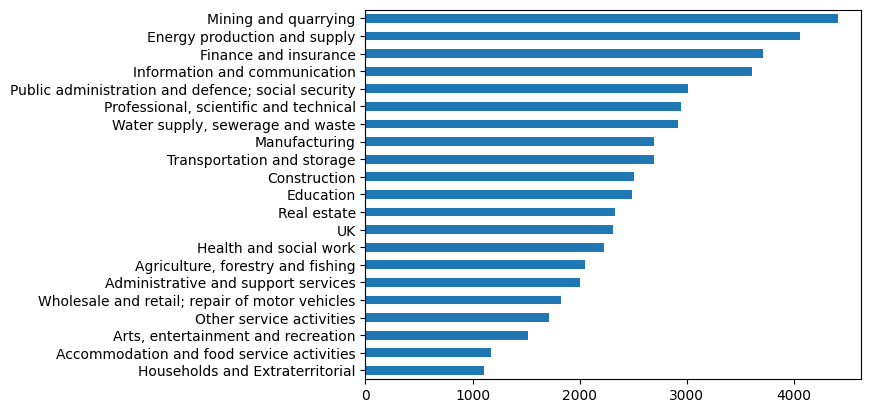

In [ ]:
industry_wages.iloc[-1,:].sort_values().plot(kind='barh')

In [ ]:
#Dundee ratio
dundee_wage=r4_wages['Dundee City'].iloc[-1]
dundee_rent=two_bedroom_df.loc['Dundee and Angus',2023]
ratio=dundee_rent/dundee_wage
ratio


0.33701627486437613